In [1]:
import os
import re
import numpy as np

import matplotlib.pyplot as plt
from collections import defaultdict

In [4]:
def get_throughput_latency_stats(log_dir):
    """
    Reads log files with lines of format:
    Time: <int>; ops_count: <int>, responseTime: <int>
    and computes:
      - Throughput (ops/sec)
      - Average latency per second (in milliseconds)
    """
    # pattern = re.compile(r"^Time: (\d+); ops_count: \d+, responseTime: (\d+)$")

    ops_per_sec = defaultdict(int)
    latency_per_sec = defaultdict(list)

    max_t = -1

    for fname in sorted(os.listdir(log_dir)):
        if not fname.endswith(".txt"):
            continue

        with open(os.path.join(log_dir, fname)) as f:
            for line in f:
                line = line.strip()

                if line.startswith("Time:"):
                    # print(line)

                    parts = [p.strip() for p in line.replace(';', ',').split(',')]
                    # print(parts)
                    time = int(parts[0].split(':')[1].strip())
                    response_time = int(parts[2].split(':')[1].strip())
                    
                    ops_per_sec[time]+=1
                    
                    latency_per_sec[time].append(response_time)

                    if time> max_t:
                        max_t = time
                        
                    # break

    # # Fill 0–60s range
    times = list(range(0, (max_t+1)))
    throughput = [ops_per_sec.get(t, 0) for t in times]
    avg_latency = [
        sum(latency_per_sec[t]) / len(latency_per_sec[t]) if latency_per_sec[t] else 0
        for t in times
    ]

    print(f"Min time: {min(times)}")
    print(f"Max time: {max(times)}")
    print(f"Total ops counted: {sum(throughput)}")
    print(f"Total latency samples: {sum(len(v) for v in latency_per_sec.values())}")
    print(np.max(times))
    print(folder, 'Avg Throuhput, Latency',np.sum(throughput) / np.max(times), (np.sum(avg_latency) / np.max(times))/1000000 )

    return times, throughput, avg_latency





In [9]:

times, throughput, lats = [],[],[]

for i in range(1):
    
    folder = '../OptimisticReplicationOuts/ycsb_num_nodes_4_nr_writepercent_10/'
    t, th, l = get_throughput_latency_stats(folder)
    times.append(t)
    throughput.append(th)
    lats.append(l)

Min time: 0
Max time: 30
Total ops counted: 11995
Total latency samples: 11995
30
../OptimisticReplicationOuts/ycsb_num_nodes_4_nr_writepercent_10/ Avg Throuhput, Latency 399.8333333333333 9.903236521119705


In [3]:

times, throughput, lats = [],[],[]

for i in range(3):
    
    folder = '../OptimisticReplicationOuts/project_'+str(i)+'/'
    t, th, l = get_throughput_latency_stats(folder)
    times.append(t)
    throughput.append(th)
    lats.append(l)

Min time: 0
Max time: 104
Total ops counted: 143715
Total latency samples: 143715
104
../OptimisticReplicationOuts/project_0/ Avg Throuhput, Latency 1381.875 5699451.274828857
Min time: 0
Max time: 87
Total ops counted: 129493
Total latency samples: 129493
87
../OptimisticReplicationOuts/project_1/ Avg Throuhput, Latency 1488.4252873563219 4773307.806418889
Min time: 0
Max time: 80
Total ops counted: 119858
Total latency samples: 119858
80
../OptimisticReplicationOuts/project_2/ Avg Throuhput, Latency 1498.225 4327104.885000451


In [4]:
failures = [0,1,2]



project_thputs = [1381, 1488, 1498]
project_lats = [5.69, 4.77, 4.32]



In [5]:
plt.rcParams.update({
    'font.size': 22,          # Default font size for all text
    'axes.titlesize': 22,     # Title font size
    'axes.labelsize': 20,     # X and Y label font size
    'xtick.labelsize': 16,    # X tick labels
    'ytick.labelsize': 16,    # Y tick labels
    'legend.fontsize': 16,    # Legend font size
})


<Figure size 1000x500 with 0 Axes>

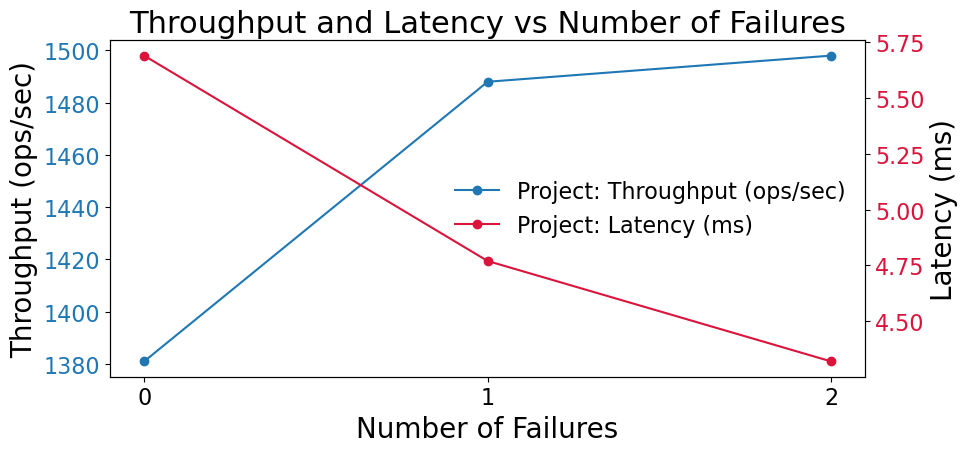

In [6]:
plt.figure(figsize=(10, 5))

# Create main axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# ---- Left Y-axis: Throughput ----
color1 = 'tab:blue'
ax1.plot(failures, project_thputs, '-o', color=color1, label='Project: Throughput (ops/sec)')
ax1.set_xlabel('Number of Failures')
ax1.set_ylabel('Throughput (ops/sec)')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticks([0, 1, 2])

# ---- Right Y-axis: Latency ----
ax2 = ax1.twinx()
color2 = 'crimson'
ax2.plot(failures, project_lats, '-o', color=color2, label='Project: Latency (ms)')
ax2.set_ylabel('Latency (ms)')
ax2.tick_params(axis='y', labelcolor=color2)

# ---- Title, grid, legends ----
plt.title('Throughput and Latency vs Number of Failures')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='right', frameon=False)

plt.tight_layout()
plt.savefig('../throughput_latency.png', dpi=150, bbox_inches='tight')
plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def smooth(y, box_pts=5):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

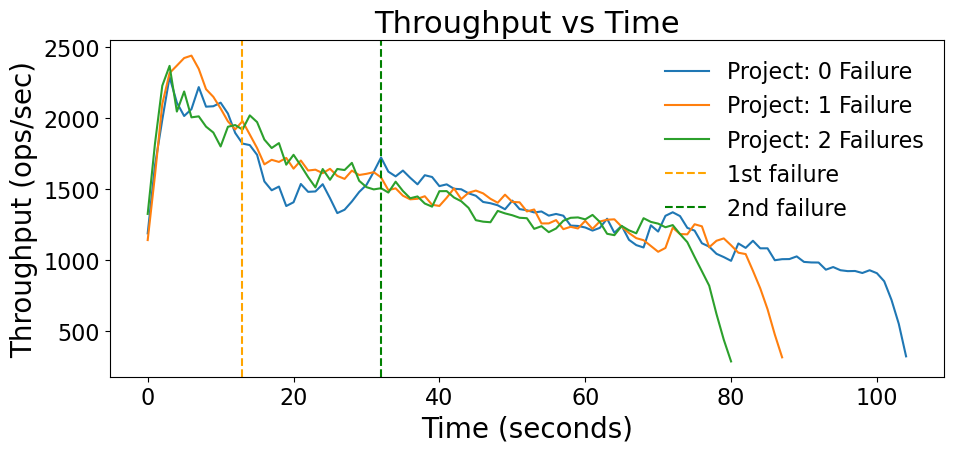

In [10]:
# ---- Plot ----
plt.figure(figsize=(10, 5))
plt.plot(times[0][:], smooth(throughput[0])[:],'-', label="Project: 0 Failure")
plt.plot(times[1][:], smooth(throughput[1])[:],'-', label="Project: 1 Failure")
plt.plot(times[2][:], smooth(throughput[2])[:],'-', label="Project: 2 Failures")

plt.title("Throughput vs Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Throughput (ops/sec)")
plt.axvline(13, ls='--', color = 'orange', label = '1st failure')
plt.axvline(32, ls='--', color = 'g', label = '2nd failure')


plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('../thputVTime.png', dpi=150, bbox_inches='tight')
plt.show()

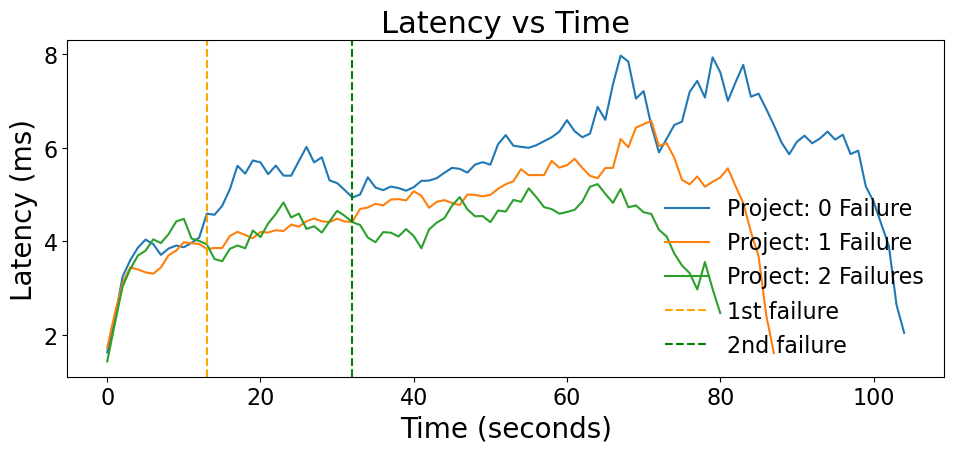

In [11]:




# ---- Plot ----
plt.figure(figsize=(10, 5))
plt.plot(times[0][:], smooth(lats[0])[:]/1e6,'-', label="Project: 0 Failure")
plt.plot(times[1][:], smooth(lats[1])[:]/1e6,'-', label="Project: 1 Failure")
plt.plot(times[2][:], smooth(lats[2])[:]/1e6,'-', label="Project: 2 Failures")

plt.title("Latency vs Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Latency (ms)")
plt.axvline(13, ls='--', color = 'orange', label = '1st failure')
plt.axvline(32, ls='--', color = 'g', label = '2nd failure')


plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('../latVTime.png', dpi=150, bbox_inches='tight')
plt.show()

In [ ]:

# times, throughput, lats = [],[],[]

# for i in range(4):
    
#     folder = '../OptimisticReplicationOuts/stack_'+str(i)+'/'
#     t, th, l = get_throughput_latency_stats(folder)
#     times.append(t)
#     throughput.append(th)
#     lats.append(l)

# times, throughput, lats = [],[],[]

# for i in range(4):
    
#     folder = '../OptimisticReplicationOuts/set_'+str(i)+'/'
#     t, th, l = get_throughput_latency_stats(folder)
#     times.append(t)
#     throughput.append(th)
#     lats.append(l)
    
# times, throughput, lats = [],[],[]

# for i in range(4):
    
#     folder = '../OptimisticReplicationOuts/project_'+str(i)+'/'
#     t, th, l = get_throughput_latency_stats(folder)
#     times.append(t)
#     throughput.append(th)
#     lats.append(l)


# times, throughput, lats = [],[],[]

# for i in range(4):
    
#     folder = '../OptimisticReplicationOuts/movie_'+str(i)+'/'
#     t, th, l = get_throughput_latency_stats(folder)
#     times.append(t)
#     throughput.append(th)
#     lats.append(l)


times, throughput, lats = [],[],[]

for i in range(4):
    
    folder = '../OptimisticReplicationOuts/project_'+str(i)+'/'
    t, th, l = get_throughput_latency_stats(folder)
    times.append(t)
    throughput.append(th)
    lats.append(l)

In [ ]:
t

In [3]:
failures = [0,1,2,3]

stack_thputs = [1142, 1215, 1237, 1242]
stack_lats = [5.63, 5.15, 4.69, 4.62]

set_thputs = [1411, 1481, 1437, 1458]
set_lats = [5.21, 4.82, 4.32, 4.37]

project_thputs = [1755, 1758, 1885]
project_lats = [4.58, 3.92, 3.68]

movie_thputs = [1799, 1814, 1770, 1834 ]
movie_lats = [4.47, 4.07, 3.90, 3.79]

course_thputs = [1756, 1850, 1831 ]
course_lats = [4.58, 4.28, 3.79]

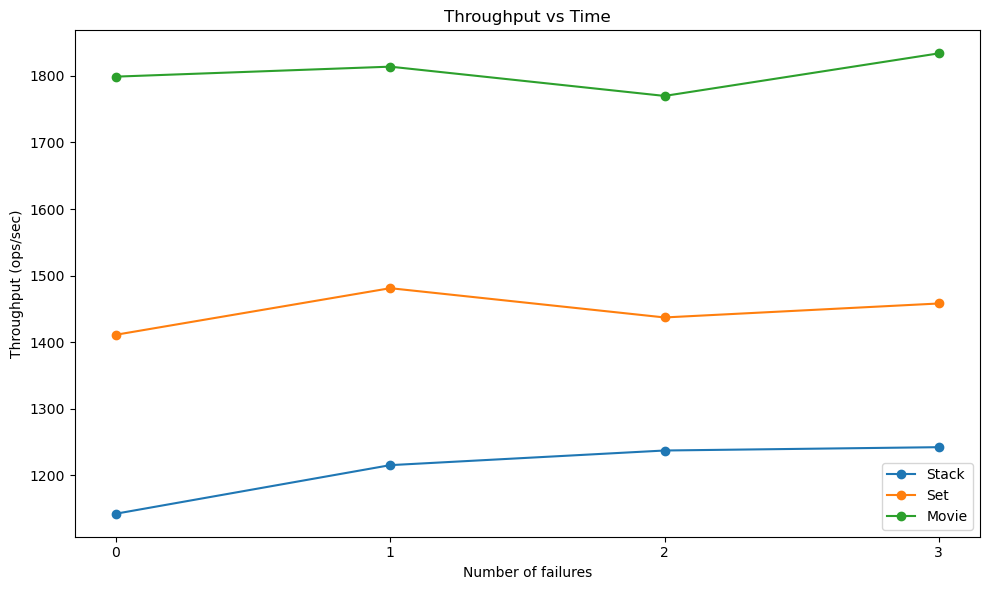

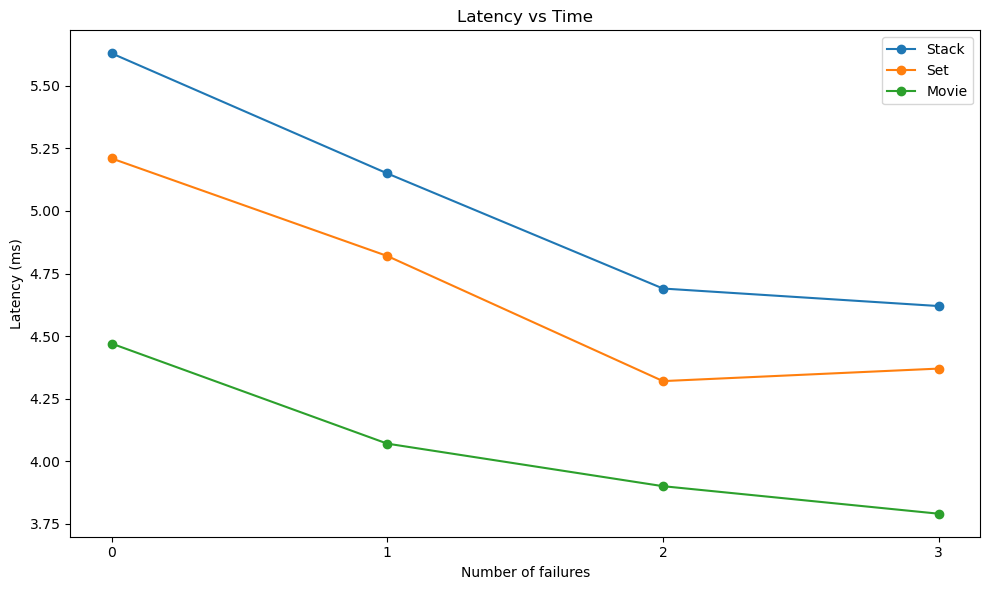

In [9]:
# ---- Plot ----
plt.figure(figsize=(10, 6))
plt.plot(failures, stack_thputs,'-o', label="Stack")
plt.plot(failures, set_thputs,'-o', label="Set")
# plt.plot(failures[:-1], project_thputs,'-o', label="Project")
plt.plot(failures, movie_thputs,'-o', label="Movie")
# plt.plot(failures[:-1], course_thputs,'-o', label="Courseware")


plt.title("Throughput vs Time")
plt.xlabel("Number of failures")
plt.ylabel("Throughput (ops/sec)")

plt.xticks([0,1,2,3])

plt.legend()
plt.tight_layout()
plt.savefig('../thput.png', dpi=150, bbox_inches='tight')
plt.show()


# ---- Plot ----
plt.figure(figsize=(10, 6))
plt.plot(failures, stack_lats,'-o', label="Stack")
plt.plot(failures, set_lats,'-o', label="Set")
# plt.plot(failures[:-1], project_lats,'-o', label="Project")
plt.plot(failures, movie_lats,'-o', label="Movie")
# plt.plot(failures[:-1], course_lats,'-o', label="Courseware")


plt.xticks([0,1,2,3])

plt.title("Latency vs Time")
plt.xlabel("Number of failures")
plt.ylabel("Latency (ms)")


plt.legend()
plt.tight_layout()
plt.savefig('../lat.png', dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
# import copy
# times1 = copy.deepcopy(times)
# throughput1 = copy.deepcopy(throughput)
# times2 = copy.deepcopy(times)
# throughput2 = copy.deepcopy(throughput)

In [ ]:
# ---- Plot ----
plt.figure(figsize=(10, 5))
plt.plot(times1[:40], throughput1[:40],'-o', label="Stack With 0 Failure")
plt.plot(times2[:40], throughput2[:40],'-o', label="Stack With 1 Failure")
plt.plot(times3[:40], throughput3[:40],'-o', label="Stack With 2 Failure")

plt.title("Throughput vs Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Throughput (ops/sec)")
plt.axvline(21, ls='--', color = 'orange', label = '1 failed')
plt.axvline(16, ls='--', color = 'g', label = '2 failed')
plt.axvline(23, ls='--', color = 'g', label = '2 failed')


plt.legend()
plt.tight_layout()
plt.savefig('../thput.png', dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
# ---- Plot ----
plt.figure(figsize=(10, 5))
plt.plot(times1[:40], (np.array(lats1)[:40]),'-o', label="Stack With 0 Failure")
plt.plot(times2[:40], (np.array(lats2)[:40]),'-o', label="Stack With 1 Failure")
plt.plot(times3[:40], (np.array(lats3)[:40]),'-o', label="Stack With 2 Failure")

plt.title("Latency vs Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Latency (ms)")
plt.axvline(21, ls='--', color = 'orange', label = '1 failed')
plt.axvline(16, ls='--', color = 'g', label = '2 failed')
plt.axvline(23, ls='--', color = 'g', label = '2 failed')


plt.legend()
plt.tight_layout()
plt.savefig('../lat.png', dpi=150, bbox_inches='tight')
plt.show()